### Customer segmentation:
Use clustering techniques to segment customers based on their demographics and purchase history.

K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems
in machine learning or data science. In this topic, we will learn what is K-means clustering algorithm,
how the algorithm works, along with the Python implementation of k-means clustering.

## Problem Statement

A Mall firm in New York tracks the overall spending behaviour of all their clients. The firm has collected their data like age, gender, annual income and the spending score. The firm is interested in grouping clients with similar spending habits. It can be done using collected information regarding salary and spending score. 
The machine learning clustering algorithms can provide an analytical method to cluster clients with similar interests.

##  Data Definition (Customer finance data)

Here's a brief version of what you'll find in the data

**Cust_Number**: Unique customer identification number

**Yearly_Income**: Annual income of the customer

**Age**: Age of the customer

**Cust_Spend_Score**: Spending score of the customer

**Sex**: Gender of the customer (0 = male, 1 = female)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans


### EDA 

In [77]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
df.shape

(200, 5)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [78]:
le=LabelEncoder()
df['Genre']=le.fit_transform(df['Genre'])

In [43]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [44]:
df.describe()
# The Mean age is 38.85 
# Mean Annual income is 60,560 $


,Genre,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


<AxesSubplot:>

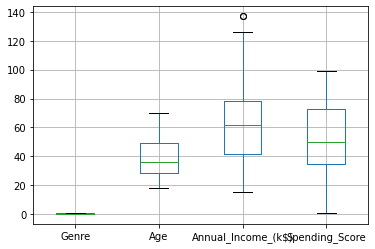

In [45]:
df.boxplot()

### Dropping the outliers

In [79]:
q1=df.quantile(.25)
q3=df.quantile(.75)
IQR=q3-q1
ll=q1-1.5*IQR
ul=q3+1.5*IQR
df_n=df[~((df<ll )|(df>ul)).any(axis=1)]
df_n=df_n.reset_index(drop=True)

In [80]:
df_n=df[~((df<ll )|(df>ul)).any(axis=1)]
df_n=df_n.reset_index(drop=True)

In [81]:
df_n.shape

(198, 5)

### Scaling The Data

In [49]:
ss=StandardScaler()

In [82]:
df_n1=df_n[['Annual_Income_(k$)','Spending_Score']]

In [83]:
# Scaling done on Required Columns
x=ss.fit_transform(df_n1)
x=pd.DataFrame(x,columns=['Annual_Income_(k$)','Spending_Score'])
x.head()

,Annual_Income_(k$),Spending_Score
0,-1.779171,-0.435989
1,-1.779171,1.199413
2,-1.739447,-1.720949
3,-1.739447,1.043661
4,-1.699723,-0.397051


In [84]:
df_n.sample(3)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
74,75,1,59,54,47
120,121,1,27,67,56


### Selecting the optimal Cluster Value

In [85]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### plotting a  Elbow plot will help us decide how many clusters to Decide

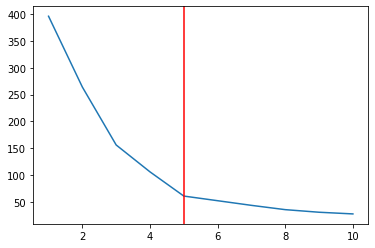

In [86]:
plt.plot(range(1,11),wcss)
plt.axvline(5,color='r')
plt.show()

In [ ]:
# Even Silhoutte score can be used to find the optimal value for clusters

In [68]:
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm

In [87]:
# create a list for different values of K
n_clusters = [2, 3, 4, 5, 6]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(x)
    score = silhouette_score(x, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))
    
# The max value will be the best cluster to select     

For 2 clusters the silhouette score is 0.3034062975427352)
For 3 clusters the silhouette score is 0.4667041091037676)
For 4 clusters the silhouette score is 0.4966903984217057)
For 5 clusters the silhouette score is 0.5599199830769206)
For 6 clusters the silhouette score is 0.5401295190538672)


visualise the Silhoutte Score

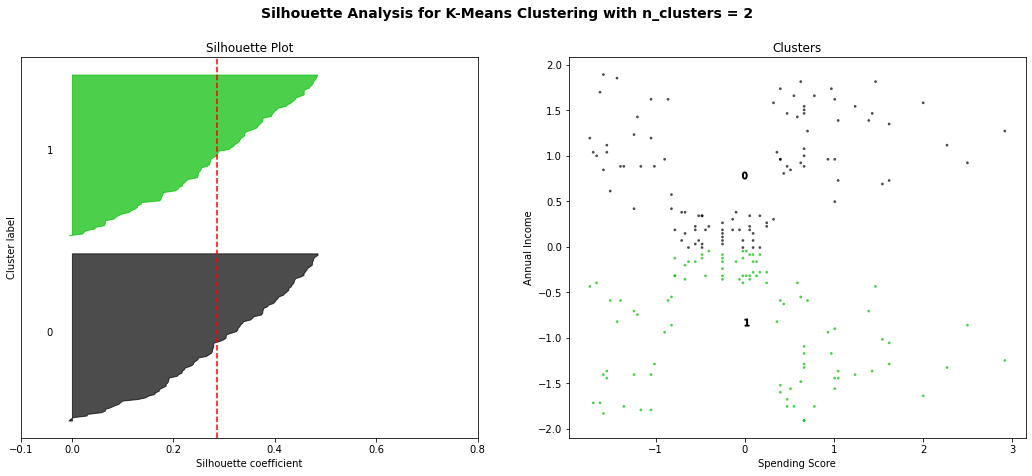

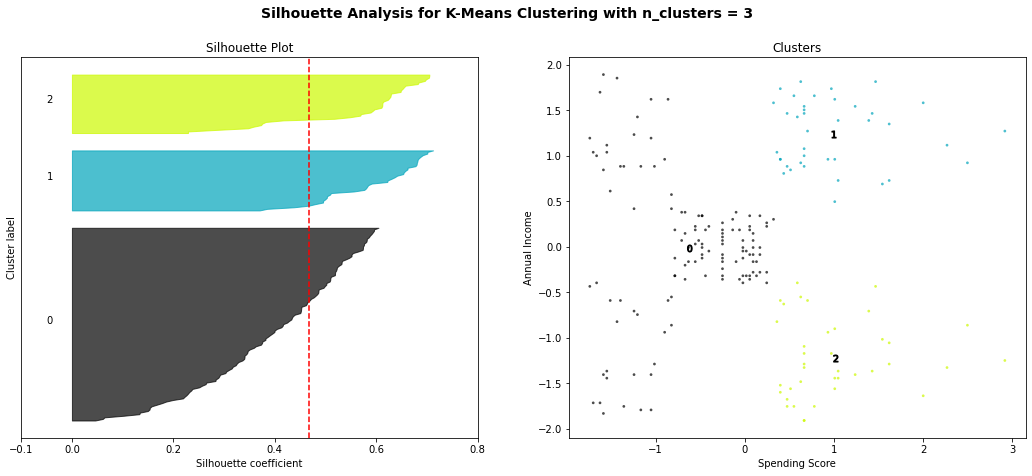

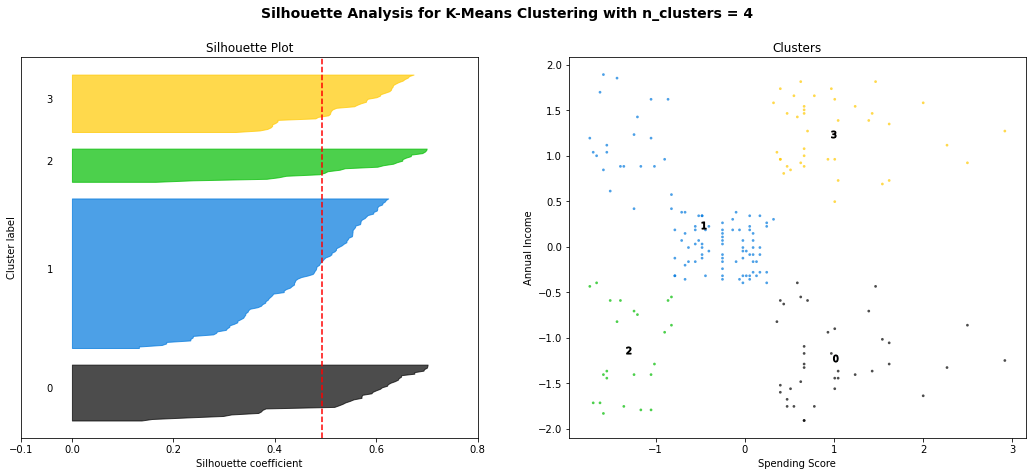

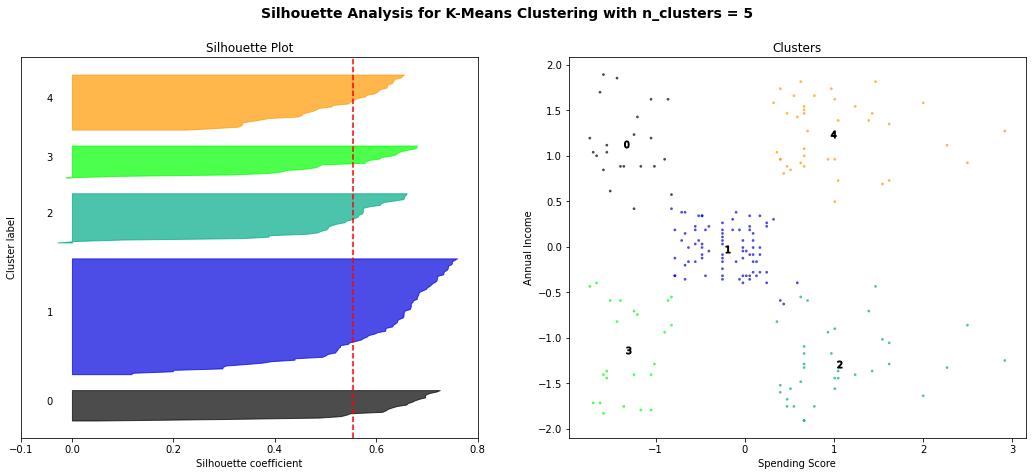

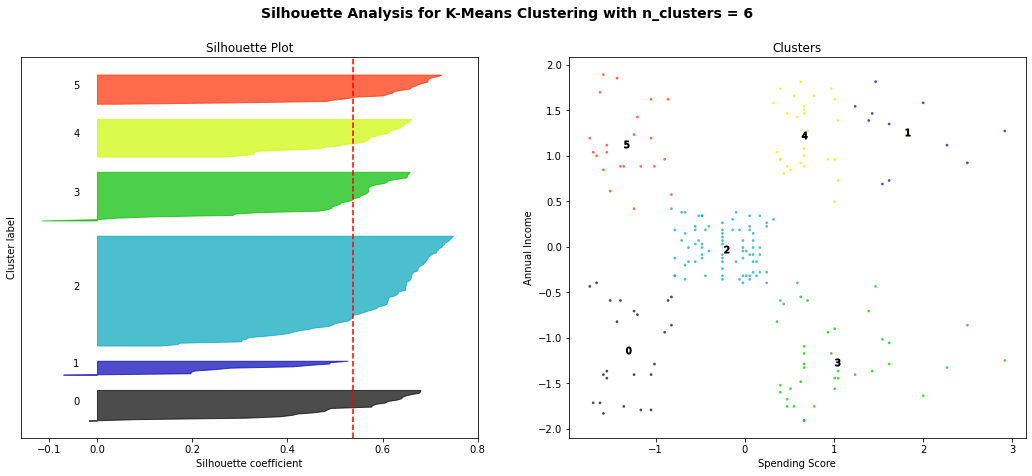

In [69]:
n_clusters = [2, 3, 4, 5, 6]

X = np.array(x)

for K in n_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    fig.set_size_inches(18, 7)

    model = KMeans(n_clusters = K, random_state = 10)
    
    cluster_labels = model.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(K):
        
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # color each cluster 
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10 

    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

    
 
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # label the cluster centers
    centers = model.cluster_centers_
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    ax2.set_title("Clusters")
    ax2.set_xlabel("Spending Score")
    ax2.set_ylabel("Annual Income")
    
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')

# display the plot
plt.show()

* The elbow and silhouute score both infer that  5  clusters are good enough

lets create a Instance for KMeans

In [98]:
df=pd.read_csv("Mall_Customers.csv")


In [99]:
q1=df.quantile(.25)
q3=df.quantile(.75)
IQR=q3-q1
ll=q1-1.5*IQR
ul=q3+1.5*IQR
df_new=df[~((df<ll )|(df>ul)).any(axis=1)]
df_new=df_n.reset_index(drop=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10940\2610395025.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_new=df[~((df<ll )|(df>ul)).any(axis=1)]


In [100]:
X_fil=df_new[['Annual_Income_(k$)','Spending_Score']]

In [101]:
X_fil=ss.fit_transform(X_fil)

In [102]:
mod=KMeans(n_clusters=5,random_state=10)
mod.fit_predict(X_fil)
df_new['Cluster']=mod.labels_

In [103]:
df_new.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,0
2,3,0,20,16,6,4
3,4,0,23,16,77,0
4,5,0,31,17,40,4


In [104]:
df_new['Cluster'].value_counts()

1    80
3    38
2    35
4    23
0    22
Name: Cluster, dtype: int64

# Visualise the count of CLusters

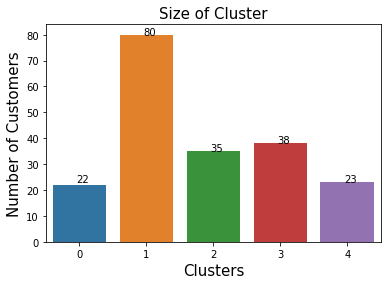

In [114]:
sns.countplot(data= df_new, x = 'Cluster')


plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)

plt.text(x = -0.05, y =23, s = np.unique(mod.labels_, return_counts=True)[1][0])
plt.text(x = 0.95, y =80, s = np.unique(mod.labels_, return_counts=True)[1][1])
plt.text(x = 1.95, y =35, s = np.unique(mod.labels_, return_counts=True)[1][2])
plt.text(x = 2.95, y =38, s = np.unique(mod.labels_, return_counts=True)[1][3])
plt.text(x = 3.95, y =23, s = np.unique(mod.labels_, return_counts=True)[1][4])

# display the plot
plt.show()

### Analyse Each Cluster

In [115]:
df_new[df_new['Cluster']==0].describe()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Cluster
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.0
mean,23.090909,0.409091,25.272727,25.727273,79.363636,0.0
std,13.147185,0.503236,5.257030,7.566731,10.504174,0.0
min,2.000000,0.000000,18.000000,15.000000,61.000000,0.0
25%,12.500000,0.000000,21.250000,19.250000,73.000000,0.0
50%,23.000000,0.000000,23.500000,24.500000,77.000000,0.0
75%,33.500000,1.000000,29.750000,32.250000,85.750000,0.0
max,46.000000,1.000000,35.000000,39.000000,99.000000,0.0


**Interpretation**
in the 0th CLuster  the Avg Annual income is 25.7k$ and their avg Spending score is 79.36
and 22 people belong to this category 


In [116]:
df_new[df_new['Cluster']==1].describe()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Cluster
count,80.000000,80.00000,80.00000,80.000000,80.000000,80.0
mean,85.737500,0.41250,42.93750,55.087500,49.712500,1.0
std,23.814549,0.49539,16.42963,8.844928,6.332943,0.0
min,44.000000,0.00000,18.00000,39.000000,35.000000,1.0
25%,65.750000,0.00000,27.00000,48.000000,44.750000,1.0
50%,85.500000,0.00000,46.50000,54.000000,50.000000,1.0
75%,105.250000,1.00000,54.25000,62.000000,55.000000,1.0
max,143.000000,1.00000,70.00000,76.000000,61.000000,1.0


**Interpretation**
in the 1st Cluster  the Avg Annual income is 55.08k$ and their avg Spending score is 49.36
and 80 people belong to this category 


In [117]:
df_new[df_new['Cluster']==2].describe()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Cluster
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.0
mean,162.485714,0.514286,40.914286,86.342857,17.571429,2.0
std,21.223421,0.507093,11.566614,14.249753,10.353419,0.0
min,125.000000,0.000000,19.000000,70.000000,1.000000,2.0
25%,146.000000,0.000000,34.000000,77.000000,10.000000,2.0
50%,163.000000,1.000000,42.000000,81.000000,16.000000,2.0
75%,180.000000,1.000000,47.500000,95.000000,25.000000,2.0
max,197.000000,1.000000,59.000000,126.000000,39.000000,2.0


**Interpretation**
in the 2nd Cluster  the Avg Annual income is 86.34k$ and their avg SPending score is 17.57
and 35 people belong to this category 


In [123]:
df_new[df_new['Cluster']==3].describe()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Cluster
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.0
mean,161.000000,0.447368,32.763158,85.210526,82.105263,3.0
std,22.226111,0.503897,3.752003,14.235771,9.489082,0.0
min,124.000000,0.000000,27.000000,69.000000,63.000000,3.0
25%,142.500000,0.000000,30.000000,75.250000,74.250000,3.0
50%,161.000000,0.000000,32.000000,78.500000,84.000000,3.0
75%,179.500000,1.000000,35.750000,91.750000,90.000000,3.0
max,198.000000,1.000000,40.000000,126.000000,97.000000,3.0


**Interpretation**
in the 3rd Cluster  the Avg Annual income is 85.2k$ and their avg Spending score is 82.36
and 38 people belong to this category 


In [119]:
df_new[df_new['Cluster']==4].describe()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Cluster
count,23.00000,23.000000,23.000000,23.000000,23.000000,23.0
mean,23.00000,0.391304,45.217391,26.304348,20.913043,4.0
std,13.56466,0.499011,13.228607,7.893811,13.017167,0.0
min,1.00000,0.000000,19.000000,15.000000,3.000000,4.0
25%,12.00000,0.000000,35.500000,19.500000,9.500000,4.0
50%,23.00000,0.000000,46.000000,25.000000,17.000000,4.0
75%,34.00000,1.000000,53.500000,33.000000,33.500000,4.0
max,45.00000,1.000000,67.000000,39.000000,40.000000,4.0


**Interpretation**
in the 4th CLuster  the Avg Annual income is 26.3k$ and their avg Spending score is 20.36
and 23 people belong to this category 


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x648 with 0 Axes>

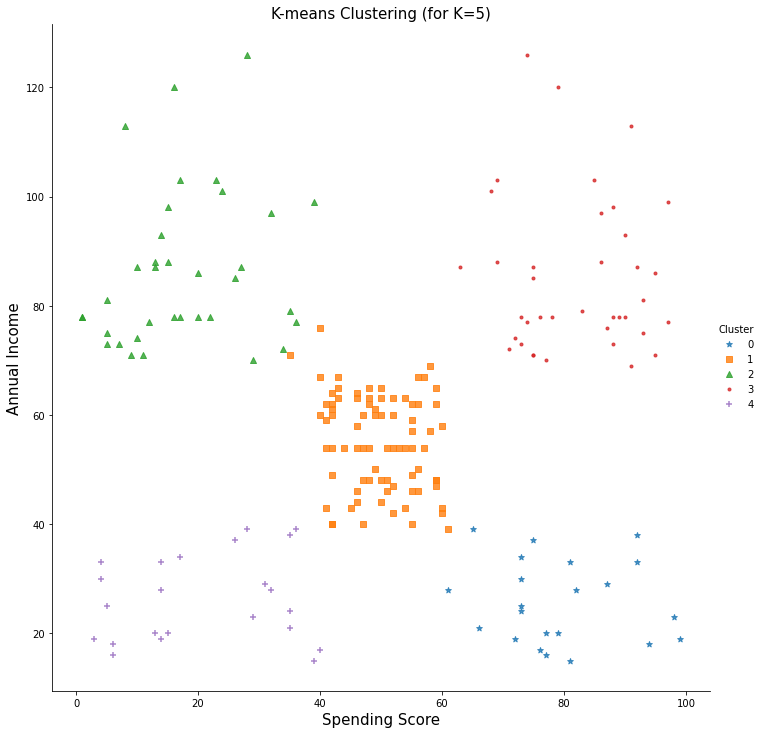

In [124]:
# plot the lmplot to visualize the clusters
# pass the different markers to display the points in each cluster with different shapes
# the 'hue' parameter returns colors for each cluster
plt.figure(figsize=(8,9))
sns.lmplot(x = 'Spending_Score', y = 'Annual_Income_(k$)', data = df_new, hue = 'Cluster', 
                markers = ['*', ',', '^', '.', '+'], fit_reg = False, size = 10)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('K-means Clustering (for K=5)', fontsize = 15)
plt.xlabel('Spending Score', fontsize = 15)
plt.ylabel('Annual Income', fontsize = 15)

# display the plot
plt.show()

# BUSINESS INSIGHT
* Cluster 3 is the Target Group where they have high income and high Spending Score the marketing Group can target the
* CLuster 1 and 2 is the median they have high  Salary as compared to 0 and 4 and spending score is also nice the Marketing   Group can also prefer Them as a target 
* CLuster 0 and Cluster 4 are almost similar ie both are less as compared to others on the basis of spending score but the   income varies 
